### We are trying to use the &lt;BikeID, TripDuration&gt; data to calculate a probability distribution of bike usage in the city, by bike

In [20]:
import scipy.stats.kde as sckde
from scipy.stats.kde import gaussian_kde

In [21]:
from skimage.measure import shannon_entropy
import scipy as sc
from scipy.interpolate import UnivariateSpline

In [22]:
import seaborn as sns
sns.set(color_codes=True)

In [23]:
# Entropy of Pandas series
def ent(data):
    """
    Function that computes the entropy of a Pandas series.
    """
    if isinstance(data, np.ndarray):
        _, counts = np.unique(data, return_counts=True)
    else:
        counts = data.value_counts()
    p_data= counts/len(data) # calculates the probabilities
    entropy=sc.stats.entropy(p_data,base=2)  # input probabilities to get the entropy 
    return entropy

In [24]:
def display_distribution(data, title_, axlabel_):
    """
    Function that takes a Pandas series containing values drawn from a distribution 
    and plots the probability distribution and rug plot
    """
    plt.figure(figsize=(15,6))
    ax=sns.distplot(data, hist=True, rug=True, kde=True, axlabel=axlabel_, \
                 kde_kws={"color": "r", "lw": 3, "label": "KDE"}, \
                 hist_kws={"histtype": "step", "linewidth": 1, \
                           "alpha": 1, "color": "g", "label": "Histogram"})
    plt.title(title_)
    plt.ylabel('Counts')

    ax2=ax.twinx()

    # Switch so count axis is on right, frequency on left
    ax2.yaxis.tick_left()
    ax.yaxis.tick_right()
    # Also switch the labels over
    ax.yaxis.set_label_position('right')
    ax2.yaxis.set_label_position('left')

    ax2.set_ylabel('Probability')
    
    summary_text="mean="+str(np.mean(data))+"\nsigma="+str(np.std(data))
    plt.figtext(0.2,0.8,summary_text)

In [25]:
rentals_df = pd.read_csv('rentals.csv', encoding='latin-1')

In [26]:
rentals_df.drop(['Trip id', 'Starttime', 'Stoptime', 'From station id', 'To station id', 'From station name', \
                 'To station name', 'Usertype'], axis=1, inplace=True)

In [27]:
rentals_df.head()

,Bikeid,Tripduration
0,70024,2659
1,70353,284
2,70067,1576
3,70191,9695
4,70353,1164


In [28]:
grouped_bikes=rentals_df.groupby(['Bikeid']).sum()
grouped_bikes=grouped_bikes.rename(columns={'Tripduration':'TripDurationPerBike'})
grouped_bikes['RentalCountPerBike']=rentals_df.groupby(['Bikeid']).count()

In [29]:
grouped_bikes.head()

,TripDurationPerBike,RentalCountPerBike
Bikeid,,
20438,97911,26
70000,373312,55
70001,96613,35
70002,218100,63
70003,294582,71


In [30]:
num_unique_bikes=rentals_df['Bikeid'].unique().shape[0]

In [31]:
grouped_bikes.sort_values('TripDurationPerBike',ascending=[False])

,TripDurationPerBike,RentalCountPerBike
Bikeid,,
70087,754274,71
70051,638283,56
70192,577867,86
70339,539621,73
70111,508253,56
70133,502715,60
70390,480506,86
70056,477249,65
70354,439607,68


In [32]:
p, x = np.histogram(grouped_bikes['TripDurationPerBike'], bins=num_unique_bikes//10)

### Plot the probaboility distributions

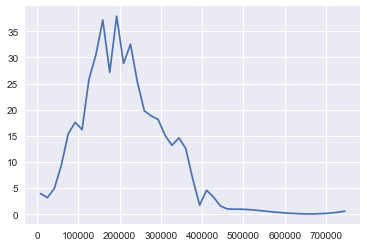

In [33]:
x = x[:-1] + (x[1] - x[0])/2   # convert bin edges to centers
f = UnivariateSpline(x, p, s=num_unique_bikes//10)
plt.plot(x, f(x))
plt.show()

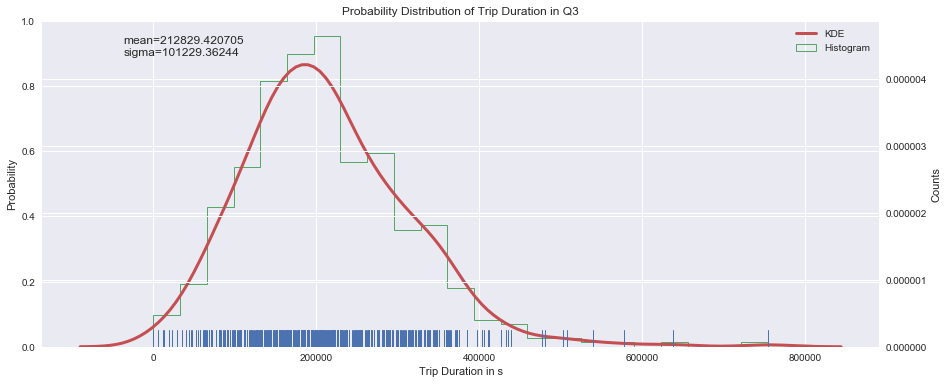

In [34]:
display_distribution(grouped_bikes['TripDurationPerBike'], \
                     title_="Probability Distribution of Trip Duration in Q3", \
                     axlabel_="Trip Duration in s")

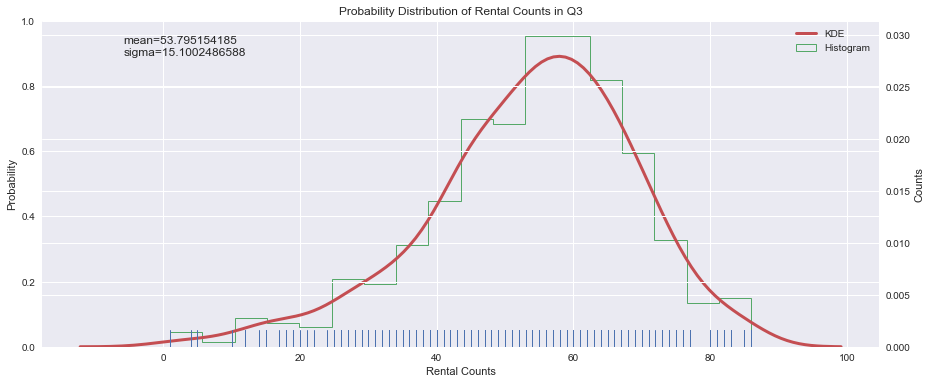

In [35]:
display_distribution(grouped_bikes['RentalCountPerBike'], \
                     title_="Probability Distribution of Rental Counts in Q3", \
                     axlabel_="Rental Counts")